### Presentado por:
    David Alejandro Aparicio Grandas - 20151020060
    Norbey Danilo Muñoz Cañón - 20151020050

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocesamiento de los datos

      -- 1. (age)       
      -- 2. (sex) sex (1 = male; 0 = female)    
      -- 3. (cp) chest pain type
                -- Value 1: typical angina
                -- Value 2: atypical angina
                -- Value 3: non-anginal pain
                -- Value 4: asymptomatic
      -- 4. (trestbps)  resting blood pressure (in mm Hg on admission to the hospital)
      -- 5. (chol)      serum cholestoral in mg/dl   
      -- 6. (fbs)       (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)     
      -- 7. restecg)   resting electrocardiographic results
                -- Value 0: normal
                -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
                -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria  
      -- 8. (thalach)   maximum heart rate achieved
      -- 9. (exang)     exercise induced angina (1 = yes; 0 = no)
      -- 10.(oldpeak)  ST depression induced by exercise relative to rest
      -- 11.(slope)    the slope of the peak exercise ST segment
                -- Value 1: upsloping
                -- Value 2: flat
                -- Value 3: downsloping
      -- 12.(ca)       number of major vessels (0-3) colored by flourosopy 
      -- 13.(thal)     3 = normal; 6 = fixed defect; 7 = reversable defect 
      -- 14.(num)      diagnosis of heart disease (angiographic disease status)
                -- Value 0: < 50% diameter narrowing
                -- Value 1: > 50% diameter narrowing
                (in any major vessel: attributes 59 through 68 are vessels)

Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

In [177]:
data = pd.read_csv('processed.cleveland.data', 
                   names=['Edad', 'Sexo', 'cp', 'trestbps', 
                          'chol', 'fbs', 'restecg', 'thalach', 
                          'exang', 'oldpeak', 'slope', 'ca', 'thal', 
                          'num']
                  )
data

,Edad,Sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [178]:
data = data.replace('?', np.nan)
data = data.dropna()
target = np.array(data['num'])
data.drop('num', axis='columns', inplace=True)
data

,Edad,Sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0


In [179]:
target

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1,
       1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 3,
       1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0, 1,
       0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4, 2, 0, 0, 1,
       0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1], dtype=int6

In [180]:
data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])
data_list = data.values.tolist()
data_list

[[63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0],
 [67.0, 1.0, 4.0, 160.0, 286.0, 0.0, 2.0, 108.0, 1.0, 1.5, 2.0, 3.0, 3.0],
 [67.0, 1.0, 4.0, 120.0, 229.0, 0.0, 2.0, 129.0, 1.0, 2.6, 2.0, 2.0, 7.0],
 [37.0, 1.0, 3.0, 130.0, 250.0, 0.0, 0.0, 187.0, 0.0, 3.5, 3.0, 0.0, 3.0],
 [41.0, 0.0, 2.0, 130.0, 204.0, 0.0, 2.0, 172.0, 0.0, 1.4, 1.0, 0.0, 3.0],
 [56.0, 1.0, 2.0, 120.0, 236.0, 0.0, 0.0, 178.0, 0.0, 0.8, 1.0, 0.0, 3.0],
 [62.0, 0.0, 4.0, 140.0, 268.0, 0.0, 2.0, 160.0, 0.0, 3.6, 3.0, 2.0, 3.0],
 [57.0, 0.0, 4.0, 120.0, 354.0, 0.0, 0.0, 163.0, 1.0, 0.6, 1.0, 0.0, 3.0],
 [63.0, 1.0, 4.0, 130.0, 254.0, 0.0, 2.0, 147.0, 0.0, 1.4, 2.0, 1.0, 7.0],
 [53.0, 1.0, 4.0, 140.0, 203.0, 1.0, 2.0, 155.0, 1.0, 3.1, 3.0, 0.0, 7.0],
 [57.0, 1.0, 4.0, 140.0, 192.0, 0.0, 0.0, 148.0, 0.0, 0.4, 2.0, 0.0, 6.0],
 [56.0, 0.0, 2.0, 140.0, 294.0, 0.0, 2.0, 153.0, 0.0, 1.3, 2.0, 0.0, 3.0],
 [56.0, 1.0, 3.0, 130.0, 256.0, 1.0, 2.0, 142.0, 1.0, 0.6, 2.0, 1.0, 6.0],
 [44.0, 1.0, 2.0, 120.0, 

## Split de datos

In [181]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data_list, target)
print(data_train)
print('-------------------\n')
print(data_test)
print('-------------------\n')
print(target_train)
print('-------------------\n')
print(target_test)

[[54.0, 0.0, 3.0, 108.0, 267.0, 0.0, 2.0, 167.0, 0.0, 0.0, 1.0, 0.0, 3.0], [59.0, 1.0, 4.0, 138.0, 271.0, 0.0, 2.0, 182.0, 0.0, 0.0, 1.0, 0.0, 3.0], [62.0, 1.0, 2.0, 120.0, 281.0, 0.0, 2.0, 103.0, 0.0, 1.4, 2.0, 1.0, 7.0], [52.0, 1.0, 1.0, 152.0, 298.0, 1.0, 0.0, 178.0, 0.0, 1.2, 2.0, 0.0, 7.0], [60.0, 0.0, 4.0, 150.0, 258.0, 0.0, 2.0, 157.0, 0.0, 2.6, 2.0, 2.0, 7.0], [44.0, 1.0, 2.0, 130.0, 219.0, 0.0, 2.0, 188.0, 0.0, 0.0, 1.0, 0.0, 3.0], [42.0, 1.0, 3.0, 120.0, 240.0, 1.0, 0.0, 194.0, 0.0, 0.8, 3.0, 0.0, 7.0], [64.0, 1.0, 1.0, 170.0, 227.0, 0.0, 2.0, 155.0, 0.0, 0.6, 2.0, 0.0, 7.0], [66.0, 1.0, 2.0, 160.0, 246.0, 0.0, 0.0, 120.0, 1.0, 0.0, 2.0, 3.0, 6.0], [41.0, 1.0, 3.0, 130.0, 214.0, 0.0, 2.0, 168.0, 0.0, 2.0, 2.0, 0.0, 3.0], [48.0, 1.0, 4.0, 130.0, 256.0, 1.0, 2.0, 150.0, 1.0, 0.0, 1.0, 2.0, 7.0], [47.0, 1.0, 3.0, 138.0, 257.0, 0.0, 2.0, 156.0, 0.0, 0.0, 1.0, 0.0, 3.0], [48.0, 1.0, 2.0, 110.0, 229.0, 0.0, 0.0, 168.0, 0.0, 1.0, 3.0, 0.0, 7.0], [39.0, 1.0, 4.0, 118.0, 219.0, 0.0, 0

## Implementacion KNN

In [226]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data_train, target_train)
score_knn = knn.score(data_test, target_test)
score_knn

0.56

In [227]:
pred_knn = knn.predict(data_test)
pred_knn

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 1], dtype=int64)

In [228]:
target_test

array([0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 4, 0, 3, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 4, 0, 3, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 2], dtype=int64)

In [229]:
knn.predict(data_test[0:1])

array([0], dtype=int64)

In [230]:
target_test[0:1]

array([0], dtype=int64)

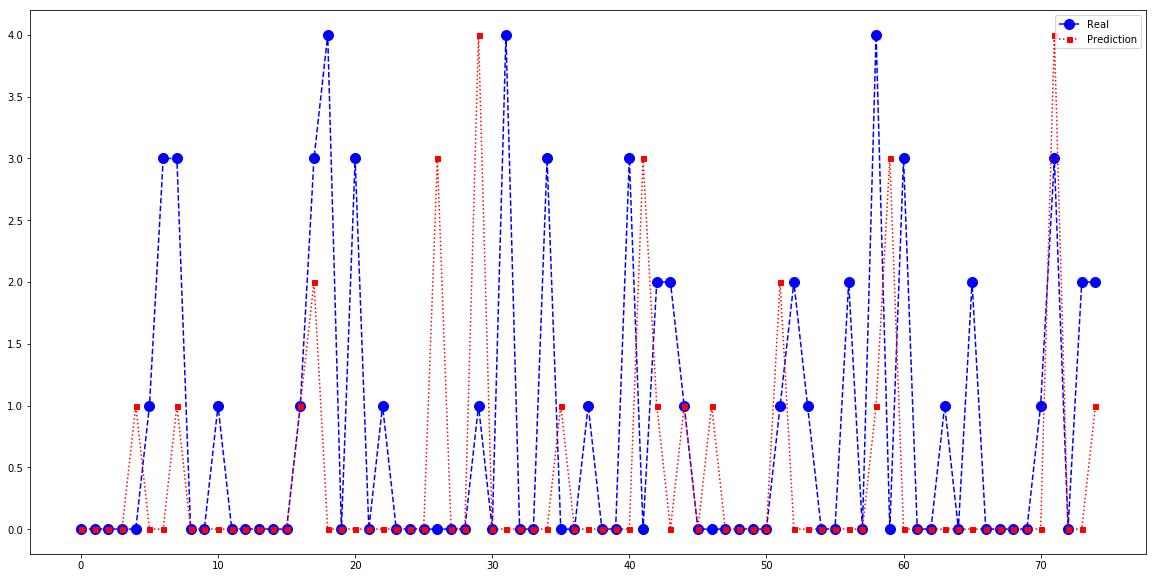

In [231]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.plot(target_test, 'b--', label='Real', marker="o", ms=10)
ax1.plot(pred_knn, 'r:', label='Prediction', marker="s", ms=5)
plt.legend()
plt.show()

## Implementacion SVM

In [232]:
from sklearn.svm import SVC

svc = SVC(C=100)
svc.fit(data_train, target_train)
score_svm = svc.score(data_test, target_test)
score_svm

C:\Users\norbe\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6133333333333333

In [233]:
pred_svm = svc.predict(data_test)
pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [234]:
target_test

array([0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 4, 0, 3, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 4, 0, 3, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 2], dtype=int64)

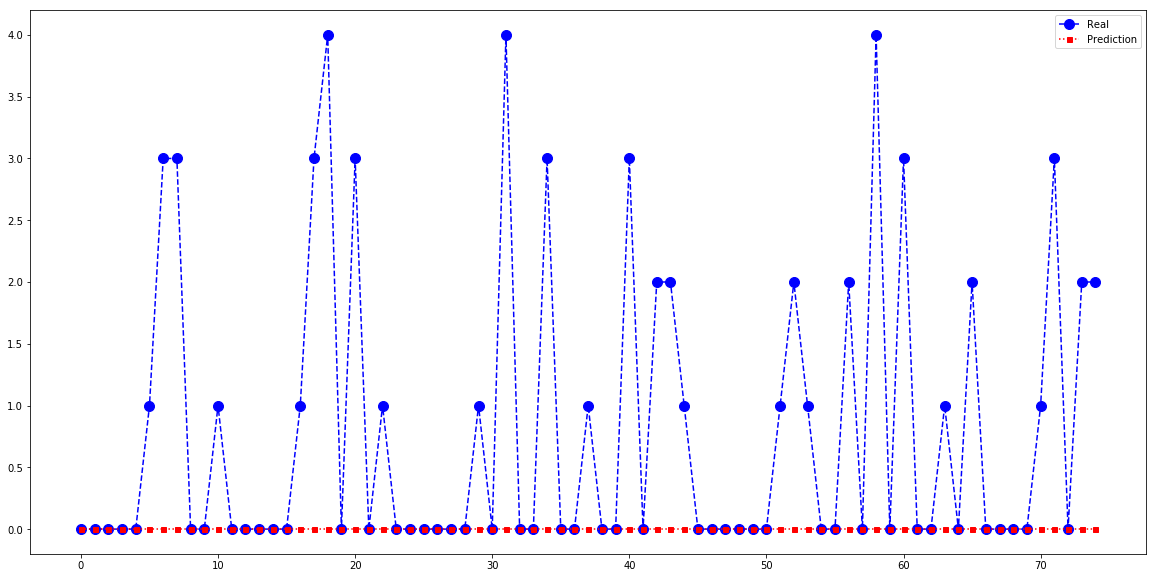

In [235]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.plot(target_test, 'b--', label='Real', marker="o", ms=10)
ax1.plot(pred_svm, 'r:', label='Prediction', marker="s", ms=5)
plt.legend()
plt.show()

## Implementacion ANN - Regresor

In [236]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(10,), activation='logistic', solver='lbfgs', random_state=8)
reg.fit(data_train, target_train)
score_reg = reg.score(data_test, target_test)
score_reg

0.568855808567359

In [237]:
pred_reg = reg.predict(data_test)
pred_reg

array([ 0.76517199,  0.18502606, -0.04224222,  0.09081822,  0.08628142,
        1.25019398,  2.34148734,  1.91659491,  0.63099296,  0.09788514,
        1.61499017,  0.0255075 ,  0.07357907,  0.09223416,  0.77974446,
        0.08704325,  1.71390487,  2.14389507,  2.14408924,  0.1101431 ,
        2.38217939,  0.41799381,  0.81204078,  1.73336592, -0.13885037,
        0.11755648,  0.15747793,  0.08577609,  0.28959642,  2.3093979 ,
        0.10759007,  2.15254068,  0.49718133,  0.11904385,  2.37504523,
        1.22125762,  0.12326299,  0.03404077,  0.08836977,  0.07605908,
        2.33875153,  0.1034713 ,  2.10560303,  1.5966833 ,  2.36217296,
        0.08005621,  2.2570209 ,  0.16826492,  0.07838905,  0.07921122,
        0.4788076 ,  2.30765243,  1.47064316,  2.14528738,  0.1667249 ,
        0.19881061,  2.38666183,  0.36300468,  2.38624005,  0.09973751,
        2.28170658,  0.07958369,  1.80828678,  2.3474659 ,  0.16892346,
        0.65126575,  0.15530546,  0.12607514,  0.1820177 ,  1.95

In [238]:
target_test

array([0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 4, 0, 3, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 4, 0, 3, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 2], dtype=int64)

In [239]:
arr = np.round(pred_reg)
arr = np.absolute(arr)
arr

array([1., 0., 0., 0., 0., 1., 2., 2., 1., 0., 2., 0., 0., 0., 1., 0., 2.,
       2., 2., 0., 2., 0., 1., 2., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0.,
       2., 1., 0., 0., 0., 0., 2., 0., 2., 2., 2., 0., 2., 0., 0., 0., 0.,
       2., 1., 2., 0., 0., 2., 0., 2., 0., 2., 0., 2., 2., 0., 1., 0., 0.,
       0., 2., 0., 2., 0., 2., 2.])

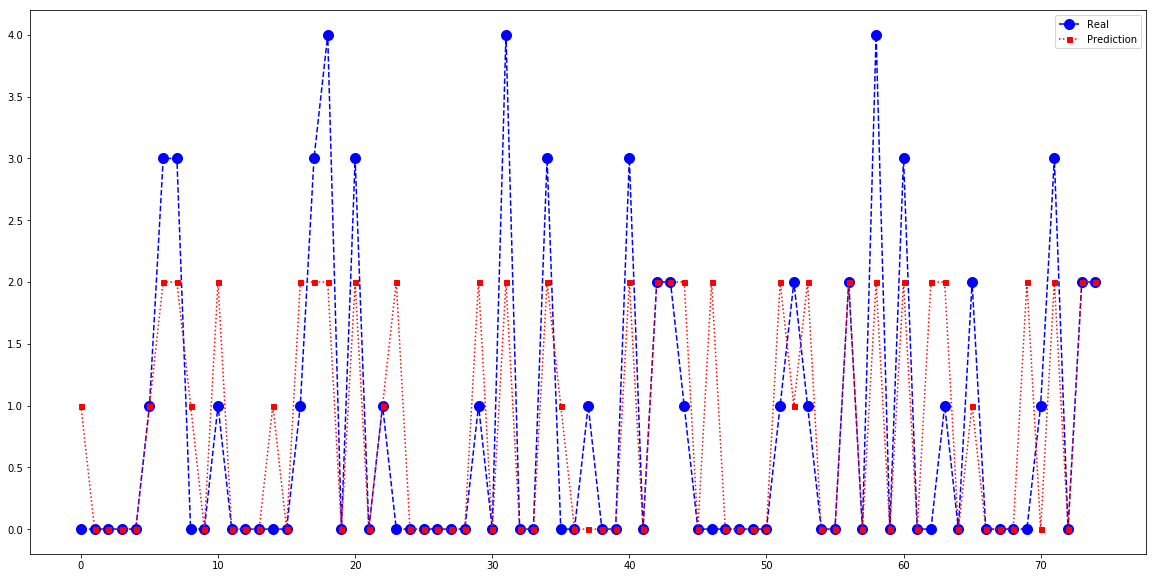

In [240]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.plot(target_test, 'b--', label='Real', marker="o", ms=10)
ax1.plot(arr, 'r:', label='Prediction', marker="s", ms=5)
plt.legend()
plt.show()

In [241]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_knn = rmse(pred_knn, target_test)
rmse_svm = rmse(pred_svm, target_test)
rmse_reg = rmse(pred_reg, target_test)

print("rmse knn es: " + str(rmse_knn))
print("rmse svm es: " + str(rmse_svm))
print("rmse reg es: " + str(rmse_reg))

rmse knn es: 1.465150731722394
rmse svm es: 1.4560219778561037
rmse reg es: 0.7929810922799426


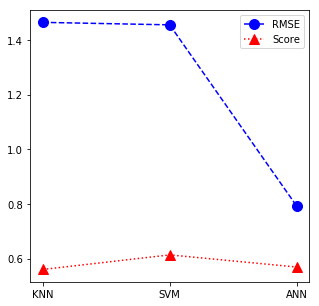

In [244]:
arrmse = np.array([rmse_knn, rmse_svm, rmse_reg])
arrmse2 = np.array(['KNN', 'SVM', 'ANN'])
arrmse3 = np.array([score_knn, score_svm, score_reg])
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1.plot(arrmse2, arrmse, 'b--', label='RMSE', marker="o", ms=10)
ax1.plot(arrmse2, arrmse3, 'r:', label='Score', marker="^", ms=10)
plt.legend()
plt.show()